In [76]:
# Import Libreries

import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load Dataset
data = pd.read_csv('dataR2.csv', index_col=False)

In [4]:
data.shape

(116, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [6]:
data.head(5)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [7]:
# Data Preprocessing

In [11]:
# To check the null values

In [12]:
def checkna(data):
    missing_values = data.isna().sum().reset_index()
    missing_values.columns = ["Features", "Missing_Values"]
    missing_values["Missing_Percent"]= round(missing_values.Missing_Values/len(data)*100,2)
    return missing_values[missing_values.Missing_Values > 0 ]

In [13]:
checkna(data)

,Features,Missing_Values,Missing_Percent


In [14]:
#To fill null values with mean

In [15]:
imputer = SimpleImputer(strategy="mean")
data = pd.DataFrame(imputer.fit_transform(data),columns = data.columns)

In [16]:
checkna(data)

,Features,Missing_Values,Missing_Percent


In [17]:
# Normalization

In [19]:
scaler = preprocessing.MinMaxScaler()
data= pd.DataFrame(scaler.fit_transform(data),columns = data.columns)

In [20]:
data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,0.369231,0.253850,0.070922,0.004908,0.000000,0.052299,0.221152,0.060665,0.224659,0.0
1,0.907692,0.114826,0.226950,0.012190,0.009742,0.052726,0.103707,0.010826,0.255926,0.0
2,0.892308,0.235278,0.219858,0.036874,0.022058,0.158526,0.571021,0.076906,0.307912,0.0
3,0.676923,0.148328,0.120567,0.014171,0.005911,0.064811,0.151538,0.121131,0.533934,0.0
4,0.953846,0.135640,0.226950,0.019936,0.013748,0.027782,0.086940,0.093375,0.440565,0.0


In [21]:
# Define target

In [50]:
X =data.drop(columns=["Classification"]).values
y =data.Classification.values

In [51]:
# Split data to train&Validation

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [53]:
# KNN- Implementation from sklearn

In [54]:
# Choose best K

Minimum error:- 0.16666666666666666 at K = 0


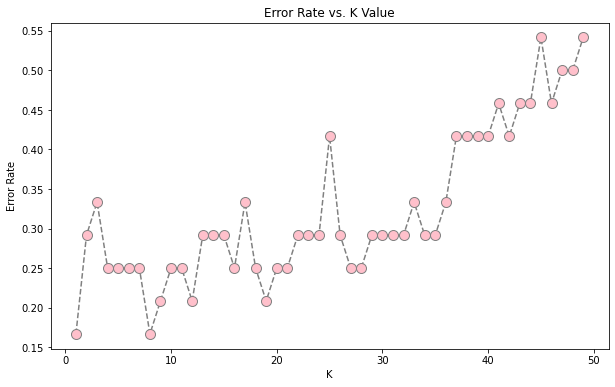

In [55]:
error_rate = []
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='grey', linestyle='dashed', 
         marker='o',markerfacecolor='pink', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [72]:
model = KNeighborsClassifier(n_neighbors=8)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [73]:
#Evaluation

In [74]:
y_pred = model.predict(X_test)

In [75]:
cr= classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.79      0.92      0.85        12
         1.0       0.90      0.75      0.82        12

    accuracy                           0.83        24
   macro avg       0.84      0.83      0.83        24
weighted avg       0.84      0.83      0.83        24



In [60]:
# KNN- Implementation from scratch

In [65]:
class BruteForceKNN:
    """
    Methods:
    -------
    fit: Calculate distances and ranks based on given data
    predict: Predict the K nearest self.neighbors based on problem type
    """ 
    import numpy as np
    from scipy import stats


    def __init__(self, k, problem: int=0, metric: int=0):
        """
            Parameters
            ----------
            k: Number of nearest self.neighbors
            problem: Type of learning
            0 = Regression, 1 = Classification
            metric: Distance metric to be used. 
            0 = Euclidean, 1 = Manhattan
        """
        self.k = k
        self.problem = problem
        self.metric = metric

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X1_test):
        import numpy as np
        from scipy import stats

        m = self.X_train.shape[0]
        n = X_test.shape[0]
        y_pred = []

        # Calculating distances  
        for i in range(n):  # for every sample in X_test
            distance = []  # To store the distances
            for j in range(m):  # for every sample in X_train
                if self.metric == 0:
                    d = (np.sqrt(np.sum(np.square(X_test[i,:] - self.X_train[j,:]))))  # Euclidean distance
                else:
                    d = (np.absolute(X_test[i, :] - self.X_train[j,:]))  # Manhattan distance
                distance.append((d, y_train[j]))    
            distance = sorted(distance) # sorting distances in ascending order

            # Getting k nearest neighbors
            neighbors = []
            for item in range(self.k):
                neighbors.append(distance[item][1])  # appending K nearest neighbors

            # Making predictions
            if self.problem == 0:
                y_pred.append(np.mean(neighbors))  # For Regression
            else:
                y_pred.append(stats.mode(neighbors)[0][0])  # For Classification
        return y_pred

In [66]:
#fitt Scratch with best K
bknn = BruteForceKNN(k=8, problem=1, metric=0)
# model fitting
bknn.fit(X_train, y_train)
# predicting
b_y_pred = bknn.predict(X_test)

In [67]:
cr1= classification_report(y_test, b_y_pred)
print(cr1)

              precision    recall  f1-score   support

         0.0       0.79      0.92      0.85        12
         1.0       0.90      0.75      0.82        12

    accuracy                           0.83        24
   macro avg       0.84      0.83      0.83        24
weighted avg       0.84      0.83      0.83        24



In [ ]:
# As you see in this dataset, two model make same results.